# MOVIES CORRELATION

## Introduction

As a data analyst, understanding the factors that contribute to the success of a movie is a critical task. By analyzing data on movie budgets, votes, and gross earnings, we can gain insights into the relationships between these variables and identify patterns that can inform decision-making in the movie industry.

Goals of the project:
* The goal of this project is to explore the correlation between movie budgets, votes, and gross earnings. 
* Specifically, we aim to identify any significant relationships between these variables and determine the extent to which they   can predict a movie's success. 
* By conducting this analysis, we hope to provide valuable insights to movie producers, studios, and investors on how to           optimize their resources and increase their chances of producing successful movies.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv(r'C:\Users\shash\Documents\Portfolio projects\Movie Correlation\movies.csv')

In [3]:
pd.set_option('display.max_row', None)
df.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1981,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [4]:
# Checking for null valus in the dataframe
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing * 100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


Based on the results we found that there are about 28% null and 2 % null values in budget and gross columns, as these are the main column for our analysis I have decided to impute the missing values.

## Imputing
Imputing missing values is the process of filling in missing data with estimated values based on the available data. In other words, when there are gaps or missing data in a dataset, imputation is a way to estimate what those missing values would have been based on the patterns in the rest of the data.

The imputing method I choose was mean imputing:
Mean imputation is a simple imputation method that replaces missing values with the mean of the available data for that variable. This method assumes that the missing values are missing at random and that the missing values have the same mean as the observed values.

In [5]:
# Imputing the missing values in the budget column
# Imputing the missing values in the gross column

budget_mean = df['budget'].mean()

df['budget'].fillna(budget_mean, inplace=True)



gross_mean = df['gross'].mean()

df['gross'].fillna(gross_mean, inplace=True)



In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing * 100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [7]:
df.dtypes

name         object
rating       object
genre        object
year         object
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Changing the datatype of the budget and gross column from float to integer as there is no use of decimal values
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [9]:
df.dtypes

name         object
rating       object
genre        object
year         object
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
# Checking for duplicates in the name column

dup = df['name'].duplicated()
num_dup = dup.sum()
print(num_dup)

156


In [11]:
# Checking the names of the duplicates
column_name = 'name'

duplicates = df[df.duplicated(subset=[column_name], keep=False)]
print(duplicates[column_name])


5                       Friday the 13th
16                                 Fame
18                              The Fog
31                           Prom Night
46                           The Island
99                  Clash of the Titans
104                          Possession
107                        Endless Love
113                        Halloween II
144                 My Bloody Valentine
154                           Neighbors
163                               Venom
171                             Quartet
178                        Night School
198                              Scream
207                           The Thing
208                 Conan the Barbarian
213                               Annie
214                         Poltergeist
217                            Paradise
272                            Parasite
330                       Lonely Hearts
366                            Bad Boys
398                              Sahara
406                            Hercules


Based on the results obtained it was observed that there are 156 moives with same name but since the released year is differnet for each movies with the same name I have decided to keep the duplicates.

In [12]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)


In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


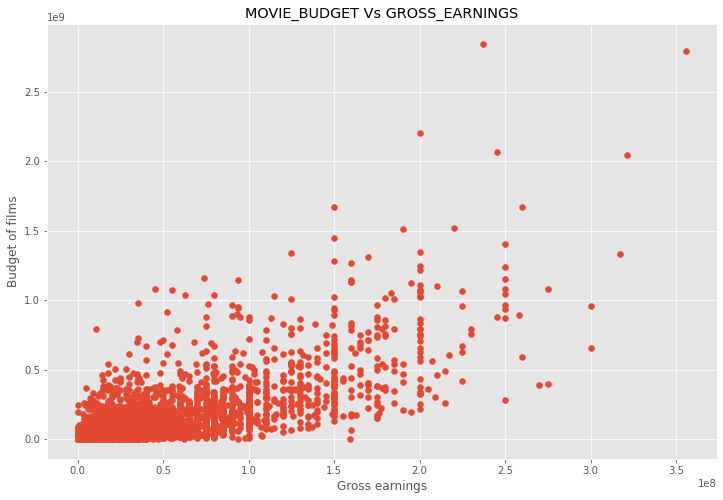

In [34]:
# Determinig the best correlation
# Checking the correlation between budget and gross 

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('MOVIE_BUDGET Vs GROSS_EARNINGS')
plt.xlabel('Gross earnings')
plt.ylabel('Budget of films')
plt.show()

Based on observing the plot we can kinda guess there is a correlation but we need to confirm it.

<AxesSubplot:xlabel='budget', ylabel='gross'>

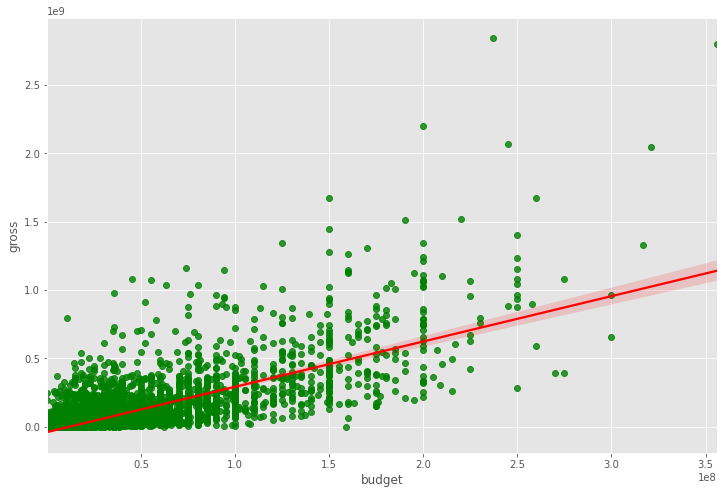

In [15]:
# Checking if the budget and gross earnings are correlated

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={"color":"green"}, line_kws={"color":"red"})

Now we can observe using the trend line and as the line is going up we can say there is a positive correlatoin and confirm that the budget and gross are correlated but now we need to see how much the correlation is.

In [18]:
# Correlation matrix between numerical columns.

df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.399451,0.309212,0.265305,0.241336,1.000000


According to the correlation matrix we can clearly observe that there is a high correlation between budget and gross.

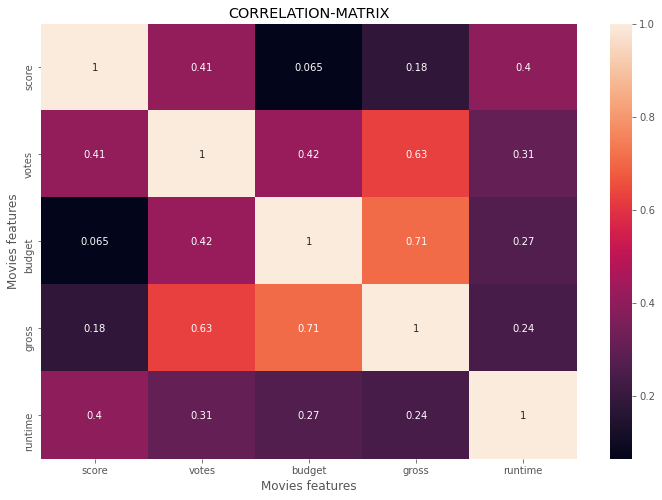

In [32]:
# Determining the actual correlation matrix using pearson method between numerical columns

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('CORRELATION-MATRIX')
plt.xlabel('Movies features')
plt.ylabel('Movies features')
plt.show()

In [47]:
# Let's check all the correlation of all the columns
df_numerical = df
for col_name in df_num.columns:
    if(df_numerical[col_name].dtype == "object"):
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes   
df_numerical.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,30,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,40,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,18,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,36,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,39,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0


Since the correlation can be done on numerical columns we changed the object column to numerical columns

In [28]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [48]:
df_numerical.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.009553,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.004829,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.082070,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052711
year,0.009553,0.004829,-0.082070,1.000000,-0.001653,0.105341,0.219954,-0.018620,-0.006134,-0.025288,-0.074166,0.259179,0.246334,-0.009185,0.121534
released,-0.011311,0.016613,0.029822,-0.001653,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.105341,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.064554,0.182868,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.219954,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.421090,0.628713,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.018620,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.006134,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.025288,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010174


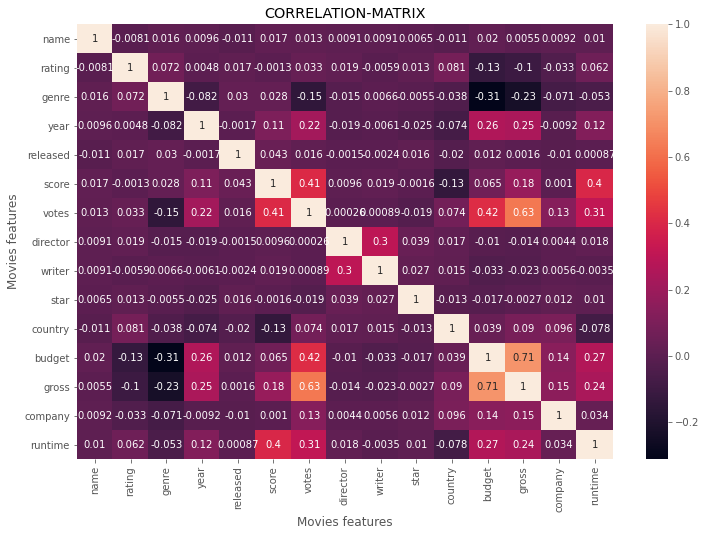

In [49]:
correlation_matrix = df_numerical.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('CORRELATION-MATRIX')
plt.xlabel('Movies features')
plt.ylabel('Movies features')
plt.show()

In [51]:
# Unstacking
corr_mat =  df_numerical.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.009553
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020368
          gross       0.005466
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.004829
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.126046
          gross      -0.102116
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [52]:
# Sorting corr_pairs

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.310566
budget    genre      -0.310566
gross     genre      -0.230267
genre     gross      -0.230267
votes     genre      -0.145307
genre     votes      -0.145307
country   score      -0.133348
score     country    -0.133348
budget    rating     -0.126046
rating    budget     -0.126046
gross     rating     -0.102116
rating    gross      -0.102116
year      genre      -0.082070
genre     year       -0.082070
country   runtime    -0.078412
runtime   country    -0.078412
year      country    -0.074166
country   year       -0.074166
genre     company    -0.071067
company   genre      -0.071067
runtime   genre      -0.052711
genre     runtime    -0.052711
          country    -0.037615
country   genre      -0.037615
budget    writer     -0.033216
writer    budget     -0.033216
rating    company    -0.032943
company   rating     -0.032943
star      year       -0.025288
year      star       -0.025288
writer    gross      -0.023210
gross     writer     -0.023210
released

In [53]:
# High correlation check

high_corr =  sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]
print(high_corr)

gross   votes     0.628713
votes   gross     0.628713
budget  gross     0.711270
gross   budget    0.711270
dtype: float64


1. Budget and Gross: Correlation coefficient is 0.711270.
2. Votes and Gross: Correlation coefficient is 0.628713.

These results suggest that there is a strong positive linear relationship between budget and gross, and moderate relationship
between votes and gross. OR in other words movies with bigger budgets tend to have higher gross earnings and movies that are 
more votes tend to have higher gross earnings as well. However, it's important to note that The success of a movie may be influenced by a variety of different things.